In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score

class NN:
    
    def __init__(self):
        self.model = Sequential()
        self.classes_ = None
    
    def fit(self, X_train, y_train):

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        
        num_classes = len(np.unique(y_train))
        y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)


        # Define the neural network model
        self.model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))
        self.classes_ = np.unique(y_train)

        # Compile the model
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Train the model
        self.model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)
        
    def predict(self, X_test):
        scaler = StandardScaler()
        X_test = scaler.fit_transform(X_test)
        predict_x = self.model.predict(X_test) 
        classes_x = np.argmax(predict_x, axis=1)
        print('predict_x', predict_x)
        print('classes_x', classes_x)
        return classes_x




In [41]:
from util.functions import impute_and_train

df_numeric =  pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, NN,)

learning with mean imputed data
Cross-validation iteration 1/5
Epoch 1/10
9/9 [==============================] - 0s 676us/step - loss: 0.7327 - accuracy: 0.5448
Epoch 2/10
9/9 [==============================] - 0s 632us/step - loss: 0.4362 - accuracy: 0.9104
Epoch 3/10
9/9 [==============================] - 0s 642us/step - loss: 0.2948 - accuracy: 0.9857
Epoch 4/10
9/9 [==============================] - 0s 600us/step - loss: 0.2032 - accuracy: 0.9964
Epoch 5/10
9/9 [==============================] - 0s 624us/step - loss: 0.1444 - accuracy: 0.9928
Epoch 6/10
9/9 [==============================] - 0s 567us/step - loss: 0.1052 - accuracy: 0.9892
Epoch 7/10
9/9 [==============================] - 0s 564us/step - loss: 0.0790 - accuracy: 0.9964
Epoch 8/10
9/9 [==============================] - 0s 609us/step - loss: 0.0591 - accuracy: 0.9964
Epoch 9/10
9/9 [==============================] - 0s 589us/step - loss: 0.0474 - accuracy: 0.9964
Epoch 10/10
1/1 [==============================] - 0s 2

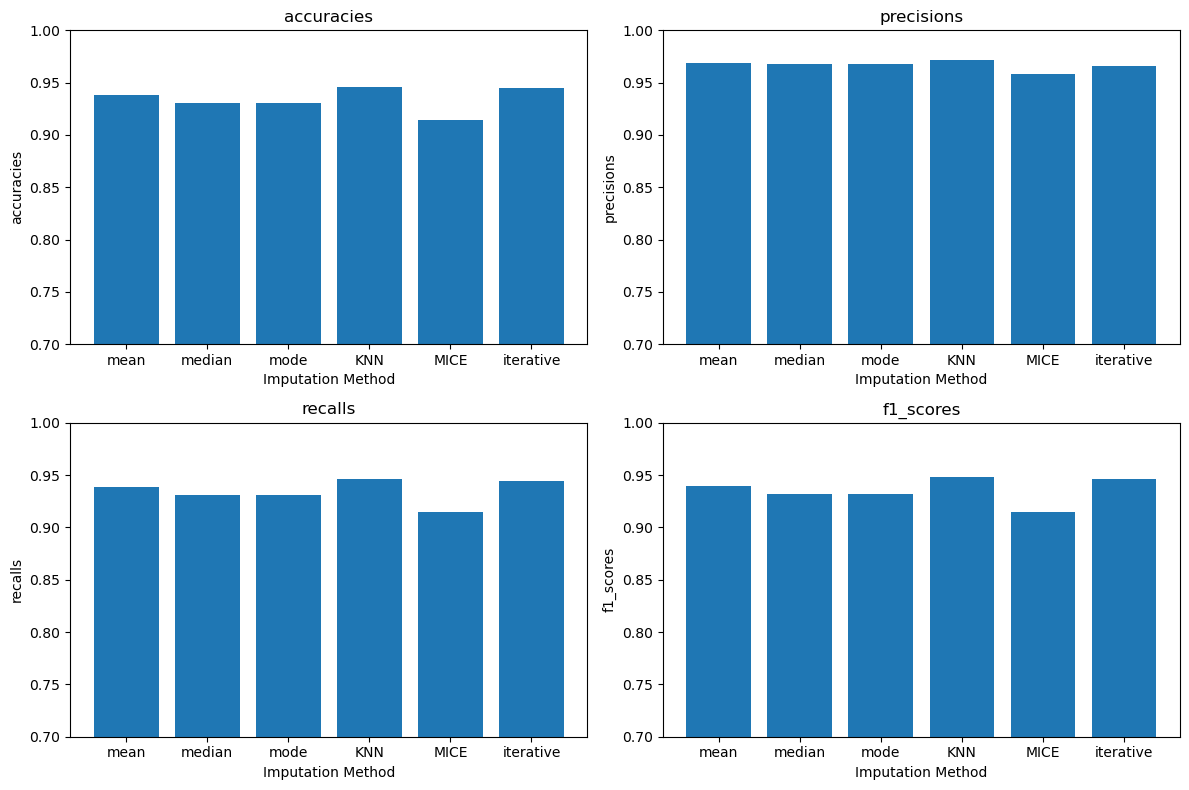

In [42]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


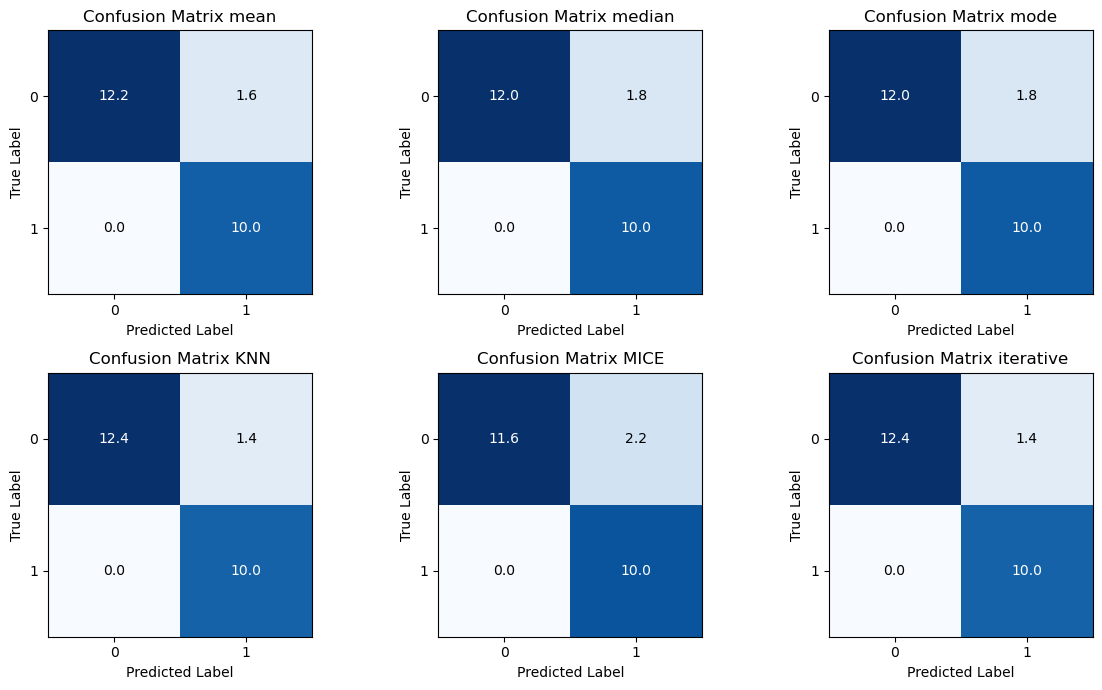

In [43]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])